
<h1 style="font-size:38pt;text-align:center">House Pricing Prediction</h1>
<h3 style="font-weight:normal;text-align:center;margin:auto">An example of Data Science methodology for Regression</h3>
<p style="float:right;font-style:italic">by Alessandro D'Angeli</p>


   <hr/>

<h1>Importing the necessary Python Libraries</h1>


In [1]:
# Standard Data Science libraries for mathematical operations and data management in Dataframes
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Sklearn allows us to preprocess data and contains the regression model classes
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

# Importing os allows us to print to screen the contents of the "input" folder in which our datasets are stored.
# This makes it easy to identify our data and the path and names to use to recover it.
import os
print(os.listdir("../input"))

['train.csv', 'sample_submission.csv', 'test.csv', 'data_description.txt']


<hr/>
<h1>Importing the training data</h1>

In [2]:
# We create a dataframe df and its copy df_train on which we will work.
df = pd.read_csv('../input/train.csv')
df_train = df.copy()

# Dropping target variable and Id
#df_train.drop('SalePrice', axis=1, inplace=True)
df_train.drop('Id', axis=1, inplace=True)

# Printing the first 5 rows of the dataframe
df_train.head(3)

# This is our data at the moment:

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


<hr/>
<h1>Managing Null Data</h1>
<p>In this case, considering the nature of the data that is missing (garage/pool size and similar), we chose to replace all NaN values with 0 to represent the lack of the features that these columns would measure.</p>

In [3]:
# We replace all NaN cells in our columns with 0
df_train.fillna(0, inplace=True)

df.head(3)

# This is the state of our data at this moment:

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


<hr/>
<h1>Converting Categorical Values</h1>
<p>As some of our variables are represented by text rather than numbers, and can't be used in the mathematical operations necessary for regression, we create dummy variables so that all categorical variables can be represented as 0s and 1s.</p>
<p>We will be assuming that we are dealing with nominal categorical variables and apply the <b>One Hot Encoding</b> method. Ordinal categorical variables would be better suited by a different approach (such as integer encoding).</p>

In [4]:
# Categorical values management
categories = df_train.select_dtypes(include=['category', object]).columns
# Uncomment the following line of code to see which of our columns contain categorical values
# print(categories)
df_categorical = pd.get_dummies(df_train, columns=categories, drop_first=True)
df_train.drop(categories.tolist(), axis=1, inplace=True)
df_train = pd.concat([df_train, df_categorical], axis=1)
df_train.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass,LotFrontage,LotArea,...,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,60,65.0,8450,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,20,80.0,9600,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,60,68.0,11250,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


<h2>Standardizing the Data</h2>
<p>We apply the StandardScaler fit_transform function to the dataframe so that the data will have a mean and unit variance of 0.</p>
<hr/>

In [5]:
# Data standardization 

# Get column names first
names = df_train.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_train_df = scaler.fit_transform(df_train)
scaled_train_df = pd.DataFrame(scaled_train_df, columns=names)
scaled_train_df.head(3)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass,LotFrontage,LotArea,...,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,0.212877,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.296026,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273,0.073375,0.212877,-0.207142,...,-0.600559,-0.56364,1.568348,-0.841191,-0.045376,-0.184376,-0.098397,-0.045376,0.337126,-0.037037,-0.156721,-0.078757,-0.069409,0.317893,-0.144841,0.299253,-0.037037,-0.037037,-0.045376,-0.205214,-0.195977,-0.347118,-0.087129,-0.037037,-0.037037,-0.186352,-0.02618,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.645747,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.236495,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288,-0.872563,0.645747,-0.091886,...,-0.600559,-0.56364,1.568348,-0.841191,-0.045376,-0.184376,-0.098397,-0.045376,0.337126,-0.037037,-0.156721,-0.078757,-0.069409,0.317893,-0.144841,0.299253,-0.037037,-0.037037,-0.045376,-0.205214,-0.195977,-0.347118,-0.087129,-0.037037,-0.037037,-0.186352,-0.02618,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,0.299451,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.291616,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154,0.073375,0.299451,0.073480,...,-0.600559,-0.56364,1.568348,-0.841191,-0.045376,-0.184376,-0.098397,-0.045376,0.337126,-0.037037,-0.156721,-0.078757,-0.069409,0.317893,-0.144841,0.299253,-0.037037,-0.037037,-0.045376,-0.205214,-0.195977,-0.347118,-0.087129,-0.037037,-0.037037,-0.186352,-0.02618,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [6]:
# Data Visualization

df_train = scaled_train_df

# Removing duplicate columns
df_train = df_train.loc[:,~df_train.columns.duplicated()]

#Seeing correlation
# df_train.corr()['SalePrice'].sort_values(ascending=False)[120:-120]
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(df_train.corr()['SalePrice'].sort_values(ascending=False))

df_train.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,0.212877,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.296026,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273,-0.215859,-0.105263,0.518133,...,-0.600559,-0.56364,1.568348,-0.841191,-0.045376,-0.184376,-0.098397,-0.045376,0.337126,-0.037037,-0.156721,-0.078757,-0.069409,0.317893,-0.144841,0.299253,-0.037037,-0.037037,-0.045376,-0.205214,-0.195977,-0.347118,-0.087129,-0.037037,-0.037037,-0.186352,-0.02618,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.645747,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.236495,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288,-0.215859,-0.105263,0.518133,...,-0.600559,-0.56364,1.568348,-0.841191,-0.045376,-0.184376,-0.098397,-0.045376,0.337126,-0.037037,-0.156721,-0.078757,-0.069409,0.317893,-0.144841,0.299253,-0.037037,-0.037037,-0.045376,-0.205214,-0.195977,-0.347118,-0.087129,-0.037037,-0.037037,-0.186352,-0.02618,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,0.299451,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.291616,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154,-0.215859,-0.105263,0.518133,...,-0.600559,-0.56364,1.568348,-0.841191,-0.045376,-0.184376,-0.098397,-0.045376,0.337126,-0.037037,-0.156721,-0.078757,-0.069409,0.317893,-0.144841,0.299253,-0.037037,-0.037037,-0.045376,-0.205214,-0.195977,-0.347118,-0.087129,-0.037037,-0.037037,-0.186352,-0.02618,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


NameError: name 'hm' is not defined

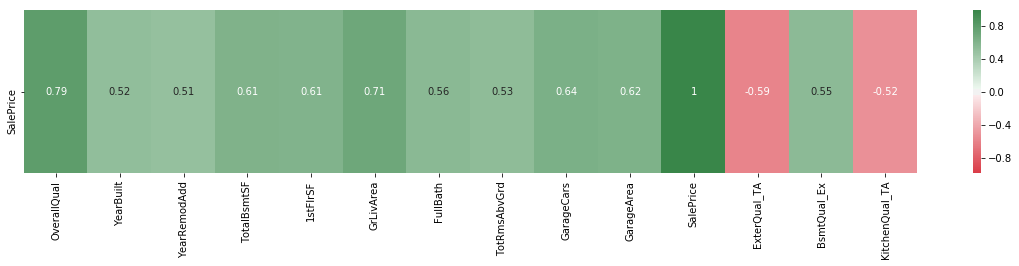

In [7]:
#correlation matrix
corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
f, ax = plt.subplots(figsize=(20, 3))
# sns.heatmap(df_train[top_corr_features].corr()[['SalePrice']].sort_values(by='SalePrice', ascending = False), vmax=.99, vmin=-0.99, annot=True, center=0, cmap=sns.diverging_palette(10, 133, as_cmap=False, n=10));
sns.heatmap(df_train[top_corr_features].corr().loc['SalePrice', :].to_frame().T, vmax=.99, vmin=-0.99, annot=True, center=0, cmap=sns.diverging_palette(10, 133, as_cmap=True, n=10)).set_xticklabels(hm.get_xticklabels(), rotation=45);


In [8]:
# Fitting the Model
X = df_train.drop('SalePrice', axis=1)
y = df['SalePrice'].values.reshape(-1,1)
lm = LinearRegression()
lm.fit(X,y)

# Viewing training set score
lm.score(X,y)

0.9332190372291713

<h2>Importing Test Data</h2>
<p>We import the Test data into a dataframe and put it through the pipepline to transform it in the same way as the training data.</p>
<hr/>

In [9]:
# Test Data Pipeline
df_test = pd.read_csv('../input/test.csv')
# Removing Id column
df_test.drop('Id', axis=1, inplace=True)
# Null values management
df_test.fillna(0, inplace=True)
# Categorical values management
categories = df_test.select_dtypes(include=['category', object]).columns
#print(categories)
df_test_categorical = pd.get_dummies(df_test, columns=categories, drop_first=True)
df_test.drop(categories.tolist(), axis=1, inplace=True)
df_test = pd.concat([df_test, df_test_categorical], axis=1)


# Managing different category values:
# This block is not part of the pipeline we applied to the training data.
# It is needed because different categorical values in the test data might generate different dummy variables (and columns) in the testing data
missing = list(set(X.columns.tolist()) - set(df_test.columns.tolist()))
df_test = pd.concat([df_test,pd.DataFrame(columns=missing)], axis = 1)
surplus = list(set(df_test.columns.tolist()) - set(X.columns.tolist()))
df_test = df_test.drop(surplus, axis=1)
df_test.fillna(0, inplace=True)




# Data standardization 
names = df_test.columns
scaler = preprocessing.StandardScaler()
scaled_test_df = scaler.fit_transform(df_test)
scaled_test_df = pd.DataFrame(scaled_test_df, columns=names)
df_test = scaled_test_df
# Removing duplicate columns
df_test = df_test.loc[:,~df_test.columns.duplicated()]

df_test.head(3)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageQual_Ex,Electrical_Mix,RoofMatl_Membran,HouseStyle_2.5Fin,Exterior1st_ImStucc,RoofMatl_CompShg,RoofMatl_Roll,Exterior2nd_Other,PoolQC_Fa,Condition2_RRAn,Electrical_FuseA,Condition2_RRNn,Heating_GasA,RoofMatl_Metal,MiscFeature_TenC,Condition2_RRAe,Utilities_NoSeWa,Heating_OthW,Exterior1st_Stone
0,-0.874711,0.684849,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063936,0.517537,-0.649392,-0.368484,-0.654561,-0.775254,-0.080483,-1.215588,-0.818068,-0.25816,-1.028720,-0.751040,-1.029543,-0.20391,-0.918335,-0.898055,0.199739,-0.984704,1.185511,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281,1.713905,-0.231148,12.037442,-1.796938,-0.445926,...,-0.026189,-0.205287,-0.203467,2.735427,-0.026189,-0.045392,-0.03705,-0.18043,-0.074253,-0.045392,-0.108578,-0.052432,-0.045392,-0.295268,-0.052432,0.399722,-0.074253,-0.091066,-0.134699,0.460211,-0.299365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.874711,0.715852,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063714,-0.297689,-0.338322,0.639542,0.433298,-0.775254,-0.080483,-0.323539,-0.818068,-0.25816,-1.028720,1.237648,0.175997,-0.20391,-0.255371,-0.898055,0.193007,-0.984704,-0.738518,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281,1.713905,-0.231148,-0.083074,0.556502,-0.445926,...,-0.026189,-0.205287,-0.203467,-0.365574,-0.026189,22.030282,-0.03705,-0.18043,-0.074253,-0.045392,-0.108578,-0.052432,-0.045392,-0.295268,-0.052432,0.399722,-0.074253,-0.091066,-0.134699,0.460211,-0.299365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.061351,0.498831,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773668,-0.297689,-0.953599,-0.264750,-0.574165,0.891944,-0.080483,0.294508,-0.818068,-0.25816,0.773083,1.237648,0.175997,-0.20391,-0.255371,0.647066,0.280523,0.302646,0.043982,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.140614,1.713905,-0.231148,-0.083074,0.556502,-0.445926,...,-0.026189,-0.205287,-0.203467,2.735427,-0.026189,-0.045392,-0.03705,-0.18043,-0.074253,-0.045392,-0.108578,-0.052432,-0.045392,-0.295268,-0.052432,0.399722,-0.074253,-0.091066,-0.134699,0.460211,-0.299365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
y_test = pd.read_csv('../input/sample_submission.csv')[['SalePrice']]
#y_test = scaler.fit_transform(y_test[['SalePrice']])
X_test = df_test
X_test.shape

(1459, 261)

In [11]:
# adapting the test set to training set
#missing = list(set(X.columns.tolist()) - set(X_test.columns.tolist()))
#print(missing)
#X_test = pd.concat([X_test,pd.DataFrame(columns=difference)])
#surplus = list(set(X_test.columns.tolist()) - set(X.columns.tolist()))
#X_test = X_test.drop(surplus, axis=1)
print(X.shape, X_test.shape)

(1460, 261) (1459, 261)


In [12]:
# Predicting with Multiple Linear Regression
yhat = lm.predict(X_test)
lm.score(X_test,y_test.values.reshape(-1,1))
yhat

array([[-5.53708186e+16],
       [-1.50655590e+17],
       [-1.45113912e+16],
       ...,
       [ 1.48152205e+16],
       [-5.89348567e+16],
       [ 3.30575558e+16]])